# Geonames: 
The GeoNames geographical database is available for download free of charge under a creative commons attribution license. 
It contains over 25 million geographical names and consists of over 12 million unique features whereof 4.8 million populated places and 16 million alternate names. 
All features are categorized into one out of nine feature classes and further subcategorized into one out of 645 feature codes.
**The data is accessible free of charge through a number of webservices and a daily database export.**

GeoNames is integrating geographical data such as names of places in various languages, elevation, population and others from various sources. 

## Access to information:
Documentation can be found [here](https://www.geonames.org/export/web-services.html). And specifically for the geonames search api [here](https://www.geonames.org/export/geonames-search.html).
Here is an example: 

http://api.geonames.org/searchJSON?q=london&maxRows=10&username=demo


Additionally, one can acces limited information with the following libraries:

- [pgeocode](https://github.com/symerio/pgeocode)
- [geocoder](https://geocoder.readthedocs.io/providers/GeoNames.html)
- [geopy](https://geopy.readthedocs.io/en/latest/)

Feature codes might be relevant: https://www.geonames.org/export/codes.html

There is a [list](https://www.geonames.org/data-sources.html) of datasources that fill GeoNames, for instance, inegi for Mexico. 

# Imports

In [28]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration

# Code:

In [6]:
import requests

# Replace 'your_username' with your GeoNames username
username = 'your_username'
base_url = 'http://api.geonames.org'

# Example endpoint and parameters (replace with the actual values)
endpoint = '/findNearbyPlaceNameJSON'
lat, lon = 19.430672, -99.196956

params = {
    'lat': f'{lat}',
    'lng': f'{lon}',
    'username': username,
}

# Make a GET request
response = requests.get(base_url + endpoint, params=params)

# Handle the response
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
else:
    print(f"Error: {response.status_code}, {response.text}")


In [8]:
data

{'geonames': [{'adminCode1': '09',
   'lng': '-99.19919',
   'distance': '0.37491',
   'geonameId': 3521305,
   'toponymName': 'Polanco',
   'countryId': '3996063',
   'fcl': 'P',
   'population': 50000,
   'countryCode': 'MX',
   'name': 'Polanco',
   'fclName': 'city, village,...',
   'adminCodes1': {'ISO3166_2': 'CMX'},
   'countryName': 'Mexico',
   'fcodeName': 'section of populated place',
   'adminName1': 'Mexico City',
   'lat': '19.43332',
   'fcode': 'PPLX'}]}

In [36]:

km1, km2 = 0.0864/16*1000, 0.0864/16*1000

latitude_soutern_edge =  lat - km1
longitude_western_edge = lon - km2
latitude_northern_edge = lat + km1
longitude_eastern_edge = lon + km2

In [52]:
#test_url = f"http://api.geonames.org/searchJSON?=mexico&south={latitude_soutern_edge}&north={latitude_northern_edge}&west={longitude_western_edge}&east={longitude_eastern_edge}&username={username}&featureCode=REST"
km1, km2 = 0.0864/1, 0.0864/1

latitude_soutern_edge =  lat - km1
longitude_western_edge = lon - km2
latitude_northern_edge = lat + km1
longitude_eastern_edge = lon + km2

test_url = f"http://api.geonames.org/searchJSON?=mexico&south={latitude_soutern_edge}&north={latitude_northern_edge}&west={longitude_western_edge}&east={longitude_eastern_edge}&username={username}"

response = requests.get(test_url)
data = response.json()

In [53]:
elements_df = pd.DataFrame(data["geonames"])

In [57]:
elements_df.fcode.value_counts()

fcode
HTL     56
PPLX    14
PPL     11
BLDG     3
MUS      2
PAL      2
MTRO     2
PRK      2
CSTL     1
AREA     1
TMPL     1
TOWR     1
LIBR     1
RSTN     1
HLL      1
RD       1
Name: count, dtype: int64

-99.196956

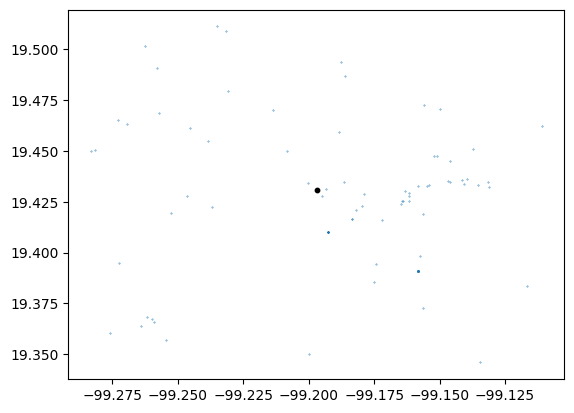

In [55]:
plt.scatter(elements_df.lng.astype(float), elements_df.lat.astype(float), s=0.1)
plt.scatter(lon, lat, s=10, c='k')
lon